In [66]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

 ## 1. Data Loading & Exploratory Data Analysis (EDA) 

In [67]:
# load the data file
df = pd.read_csv("Stock Prices Data Set.csv")
df.head(10)

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
5,ABT,2014-01-02,38.0900,38.4000,38.0000,38.2300,4967472
6,ACN,2014-01-02,81.5000,81.9200,81.0900,81.1300,2405384
7,ADBE,2014-01-02,59.0600,59.5300,58.9400,59.2900,2746370
8,ADI,2014-01-02,49.5200,49.7500,49.0400,49.2800,2799092
9,ADM,2014-01-02,43.2200,43.2900,42.7900,42.9900,2753765


In [68]:
# display some information for data 
print(df.shape)
print(df.info())

(497472, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None


In [69]:
# create sum statistics
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


## 2. Data Cleaning 


In [70]:
# cheak the number of null values 
print(df.isnull().sum())

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [71]:
# delete the null values
df.dropna()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [72]:
df.duplicated().sum()

np.int64(0)

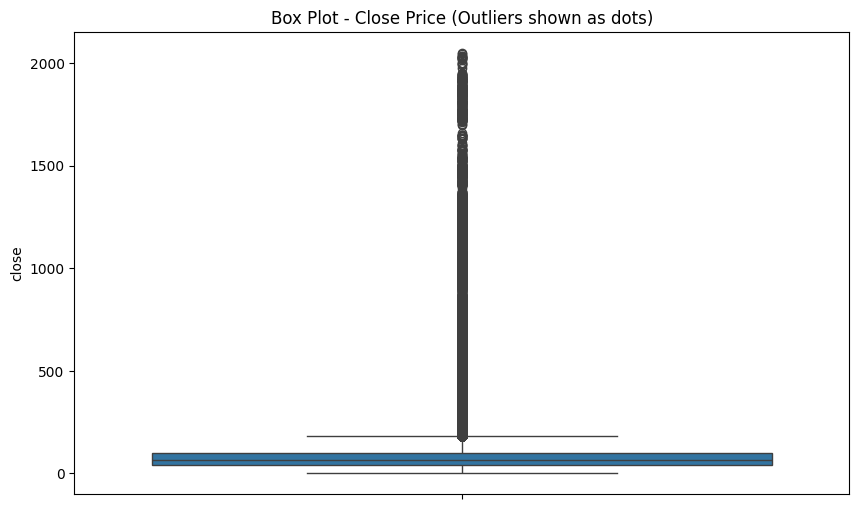

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='close')
plt.title('Box Plot - Close Price (Outliers shown as dots)')
plt.show()

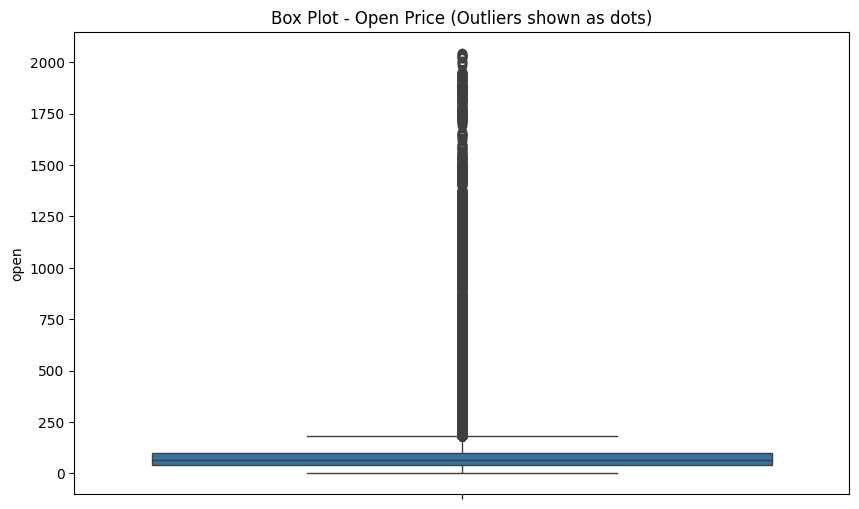

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='open')
plt.title('Box Plot - Open Price (Outliers shown as dots)')
plt.show()

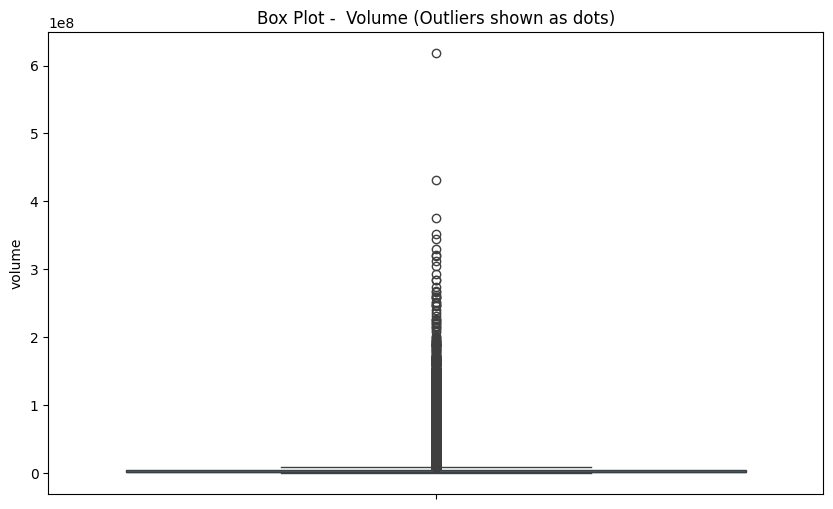

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='volume')
plt.title('Box Plot -  Volume (Outliers shown as dots)')
plt.show()

In [76]:
# Remove outliers from multiple columns
def remove_outliers(dataframe, columns):
    df_clean = dataframe.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        
        df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & 
                            (df_clean[col] <= Q3 + 1.5*IQR)]
    
    return df_clean


df_clean = remove_outliers(df, ['close', 'open', 'volume'])
print(f"Number of colunms before delete  {len(df)}")
print(f"Number of colunms after delete outliers: {len(df_clean)}")

Number of colunms before delete  497472
Number of colunms after delete outliers: 413291


## 3. Feature Engineering

In [77]:
# create two columns for months and years 
df_clean["months"] = pd.to_datetime(df_clean["date"]).dt.month
df_clean["years"] = pd.to_datetime(df_clean["date"]).dt.year

In [78]:
df_clean["symbol"].value_counts()

symbol
NEE     1007
LNC     1007
LUK     1007
UNM     1007
APH     1007
        ... 
T          5
MSFT       4
F          4
MU         3
AGN        1
Name: count, Length: 489, dtype: int64

In [79]:
df_clean['price_range'] = df_clean['high'] - df_clean['low']
df_clean['price_change'] = df_clean['close'] - df_clean['open']
df_clean['avg_price'] = (df_clean['open'] + df_clean['high'] + df_clean['low'] + df_clean['close']) / 4

In [80]:
lb = LabelEncoder()
df_clean["symbol_LB"] = lb.fit_transform(df_clean["symbol"])


In [81]:
# delete colunms not import now
df_clean.drop(["symbol","date"],axis=1,inplace=True)

In [82]:
# create a new feature 
df_clean["Daily_Return"] = (df_clean["close"]-df_clean["open"])/df_clean["open"]

## 5. Data Splitting

In [83]:
train_data ,test_data = train_test_split(df_clean , train_size=0.7 , random_state= 42)

In [84]:
print(train_data.shape)
print(test_data.shape)

(289303, 12)
(123988, 12)


## Save Data

In [85]:
train_data.to_csv("train_data_new.csv")
test_data.to_csv("test_data_new.csv")